In [1]:
!nvidia-smi

Tue Mar  4 14:40:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 23.0 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("yolo-do-it-yhopz").project("helmet-detector-9rzmg-bmd6q")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Helmet-Detector-1 in yolov11:: 100%|██████████| 5696/5696 [00:00<00:00, 7120.64it/s]


In [5]:
dataset.location

'/content/Helmet-Detector-1'

In [6]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 103MB/s]
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Helmet-Detector-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

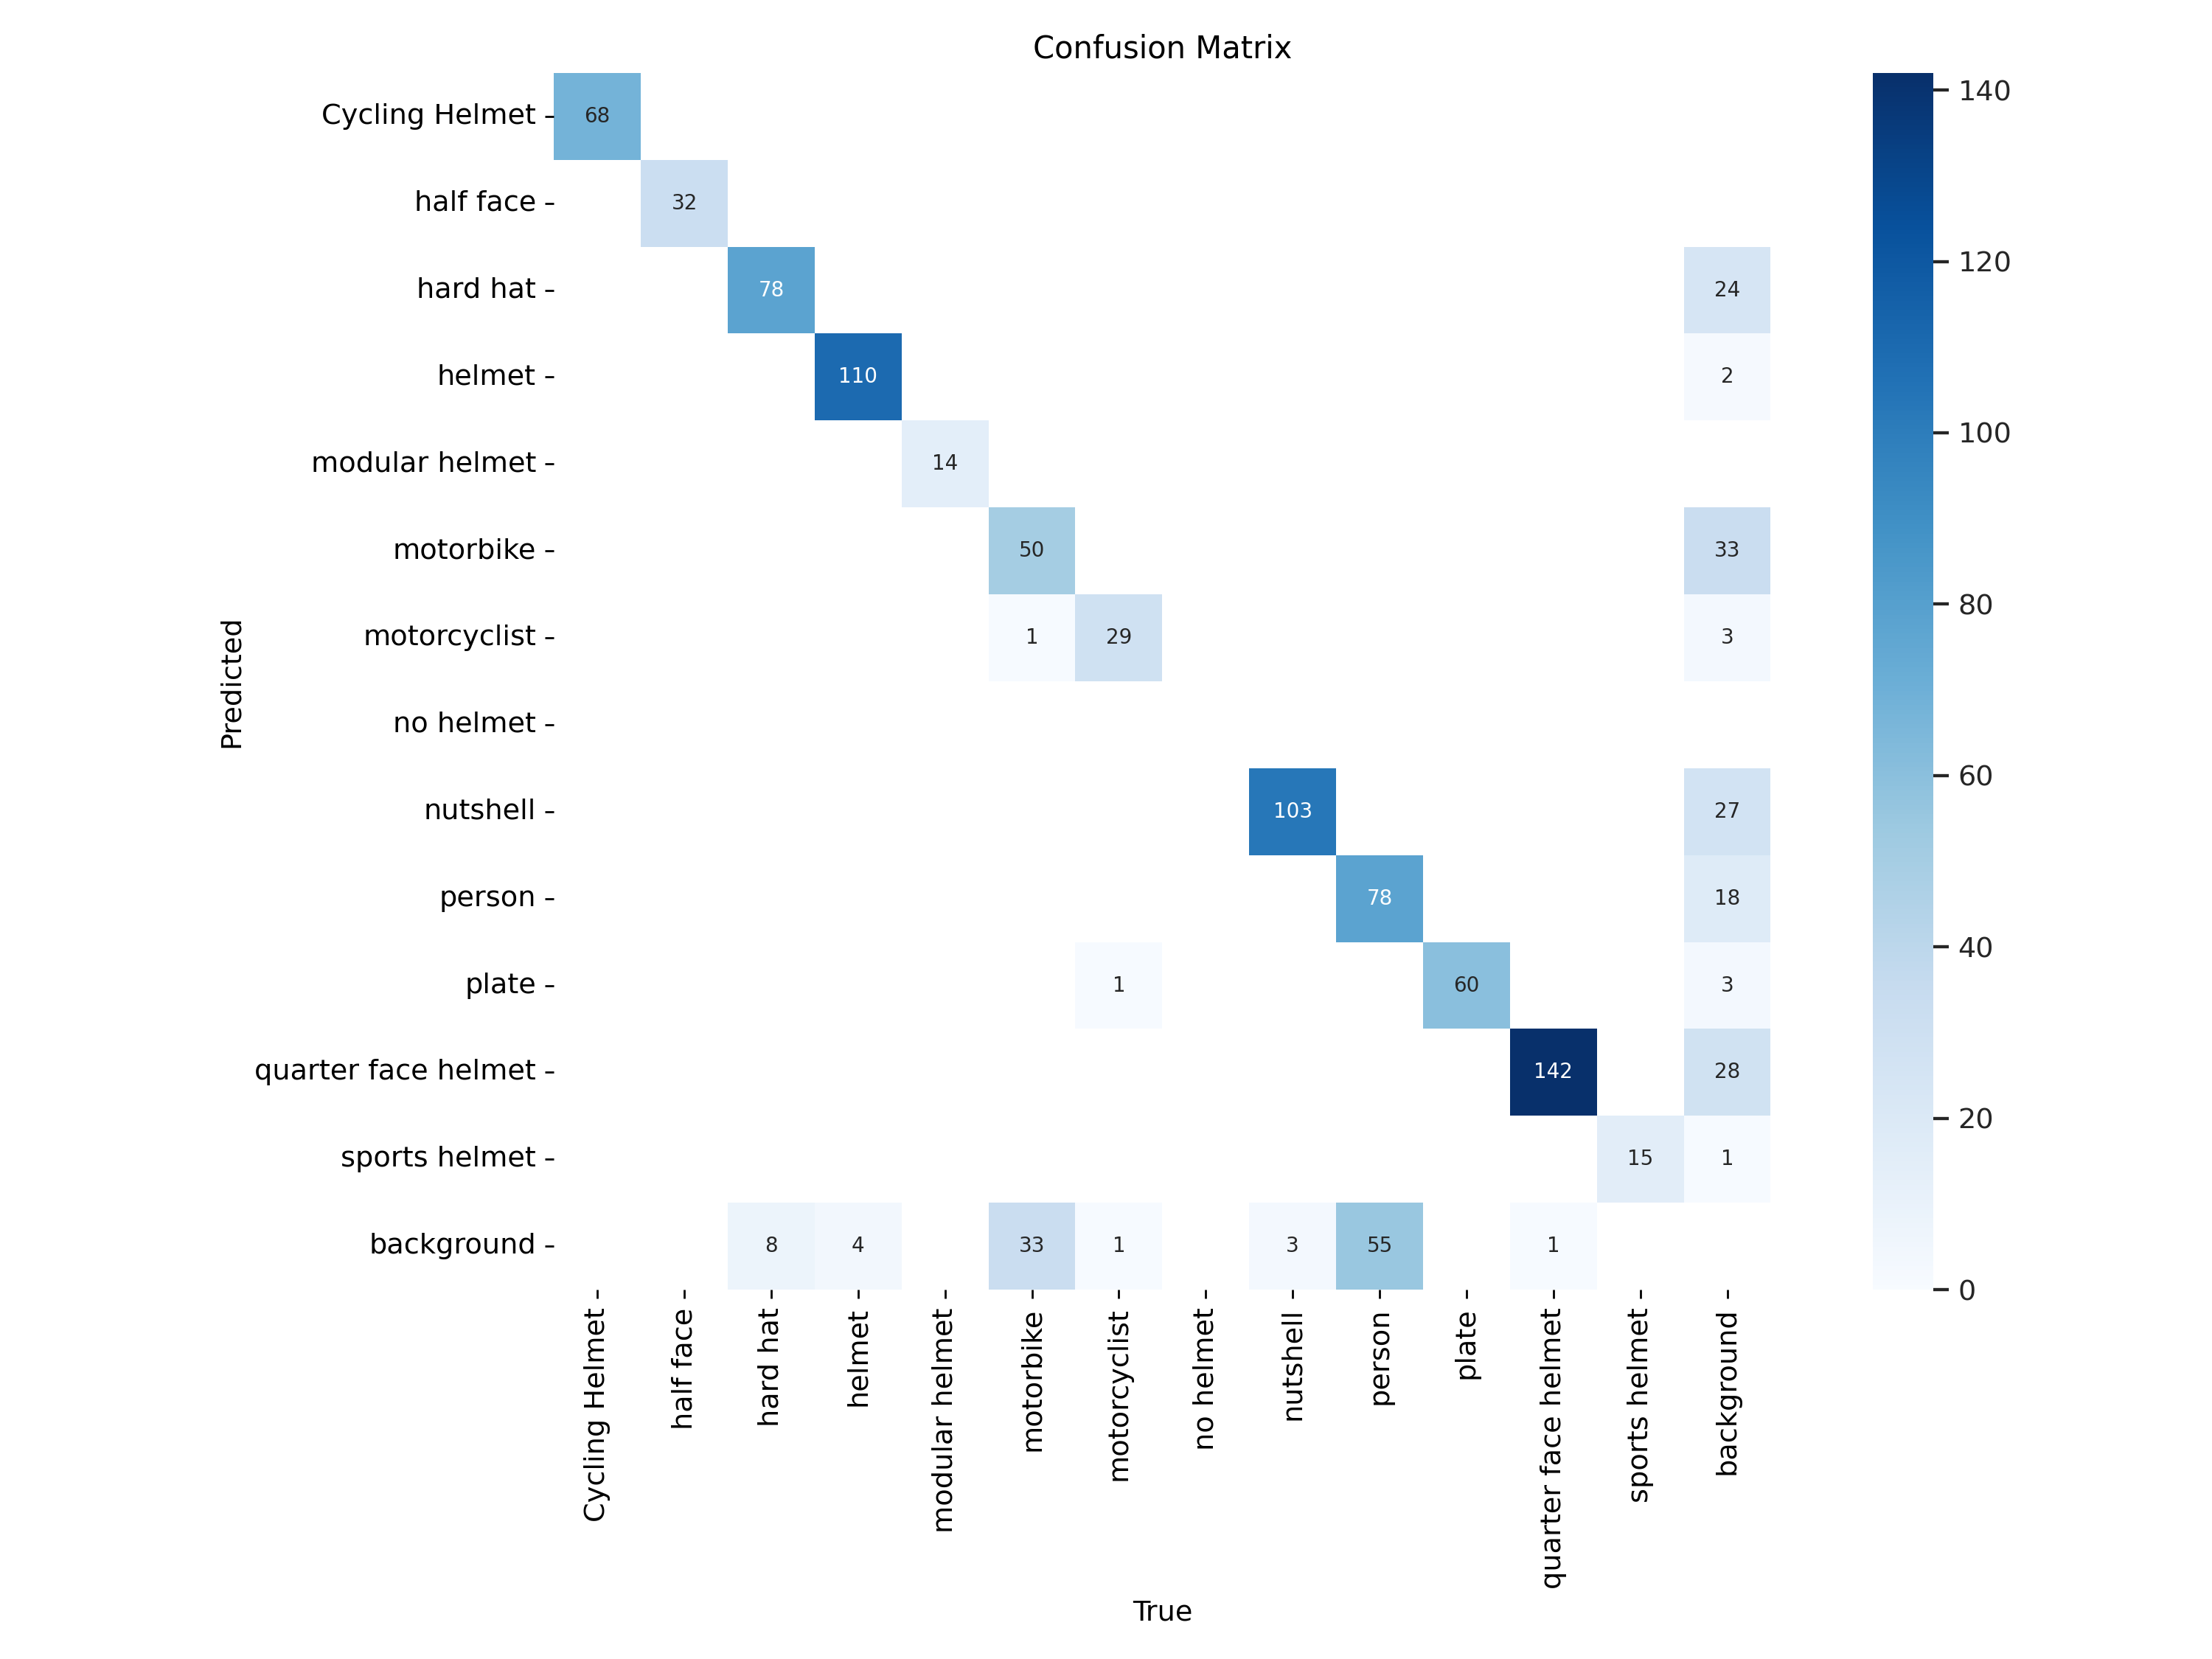

In [7]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

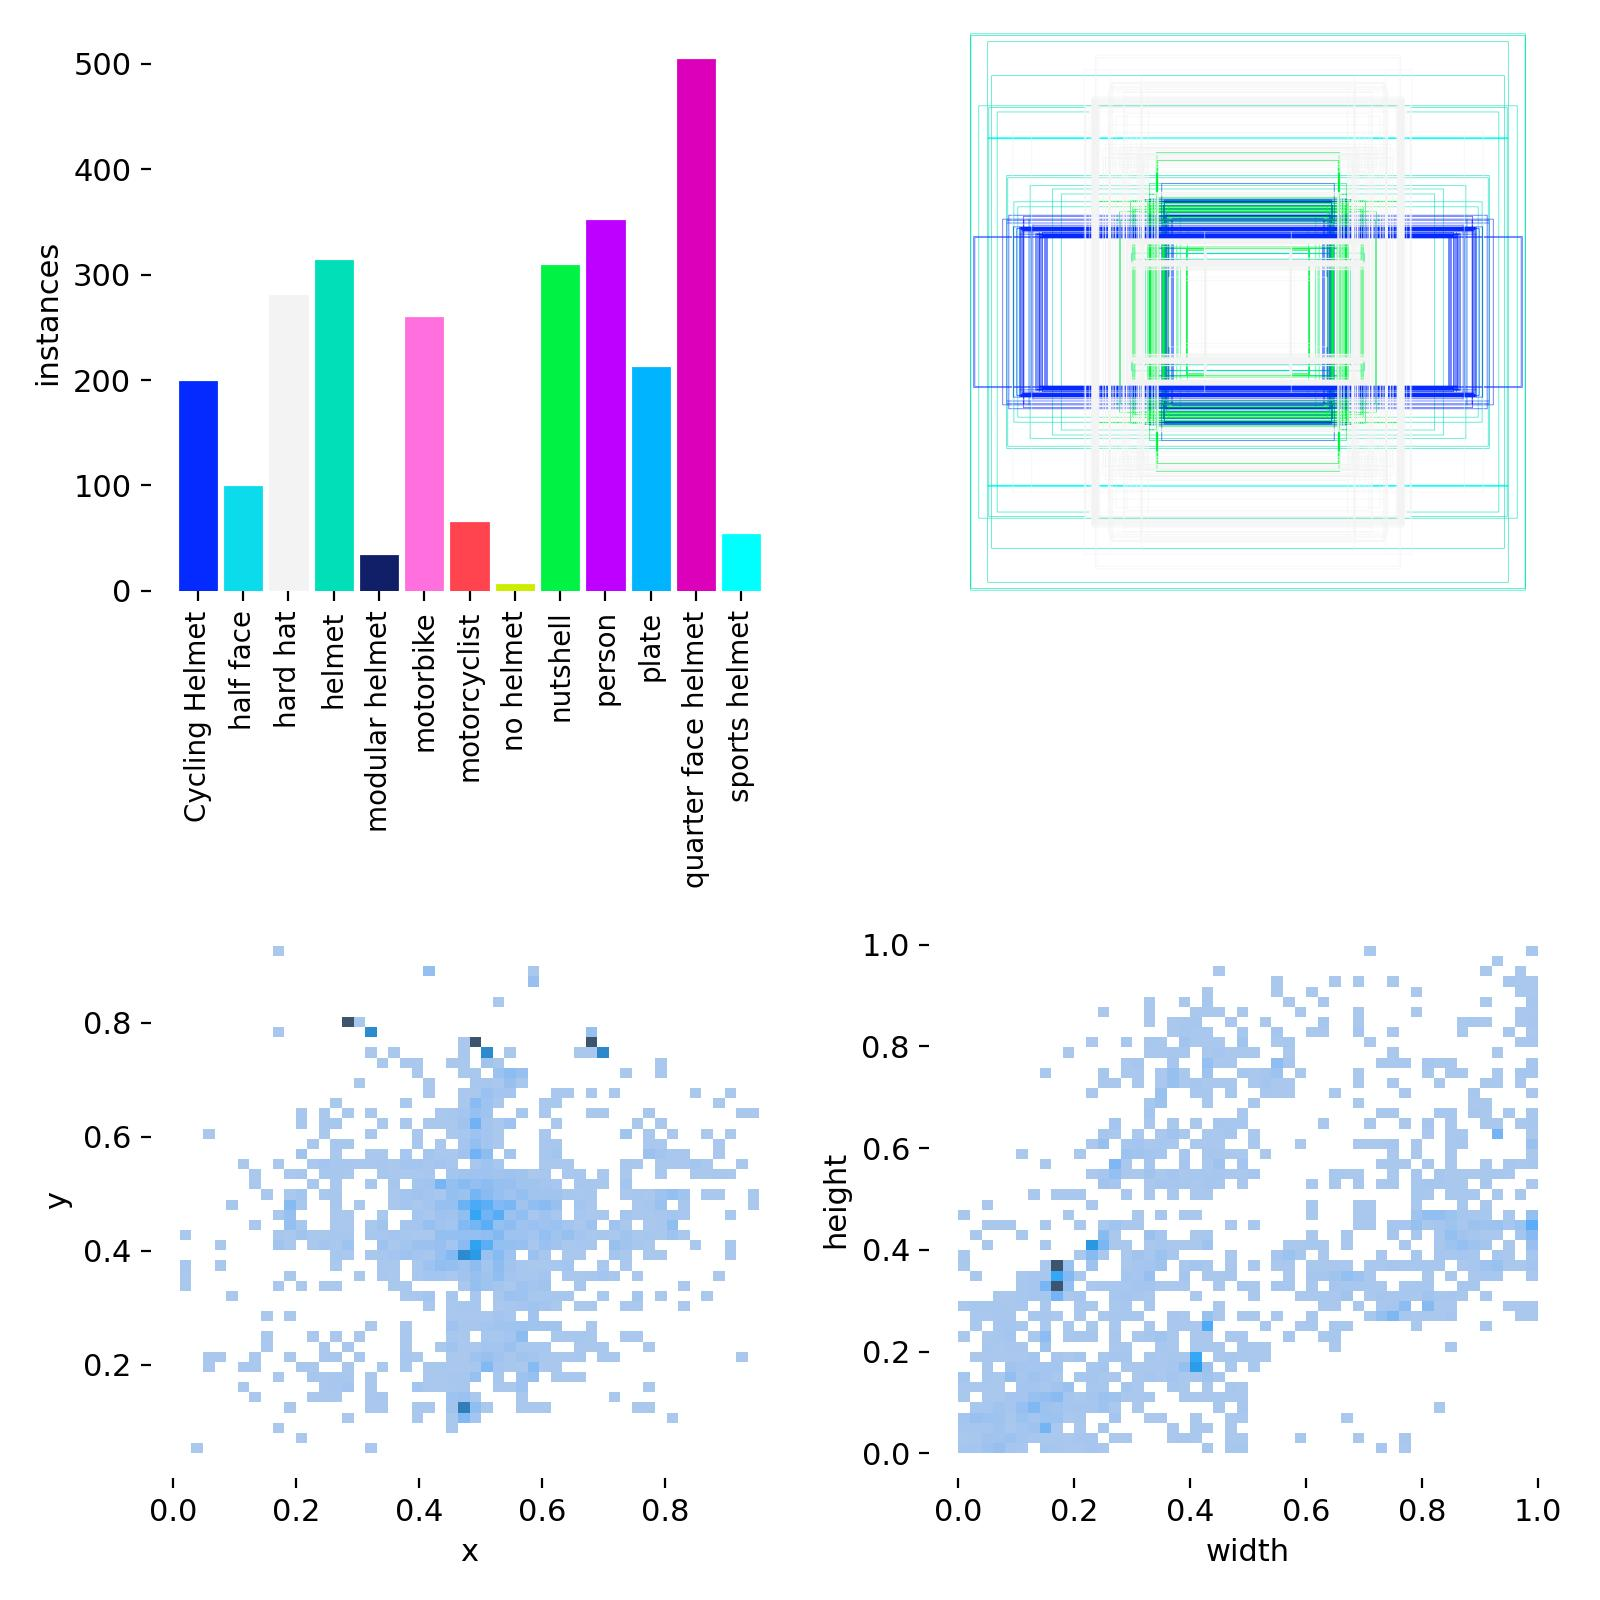

In [8]:
Image("/content/runs/detect/train/labels.jpg", width=600)

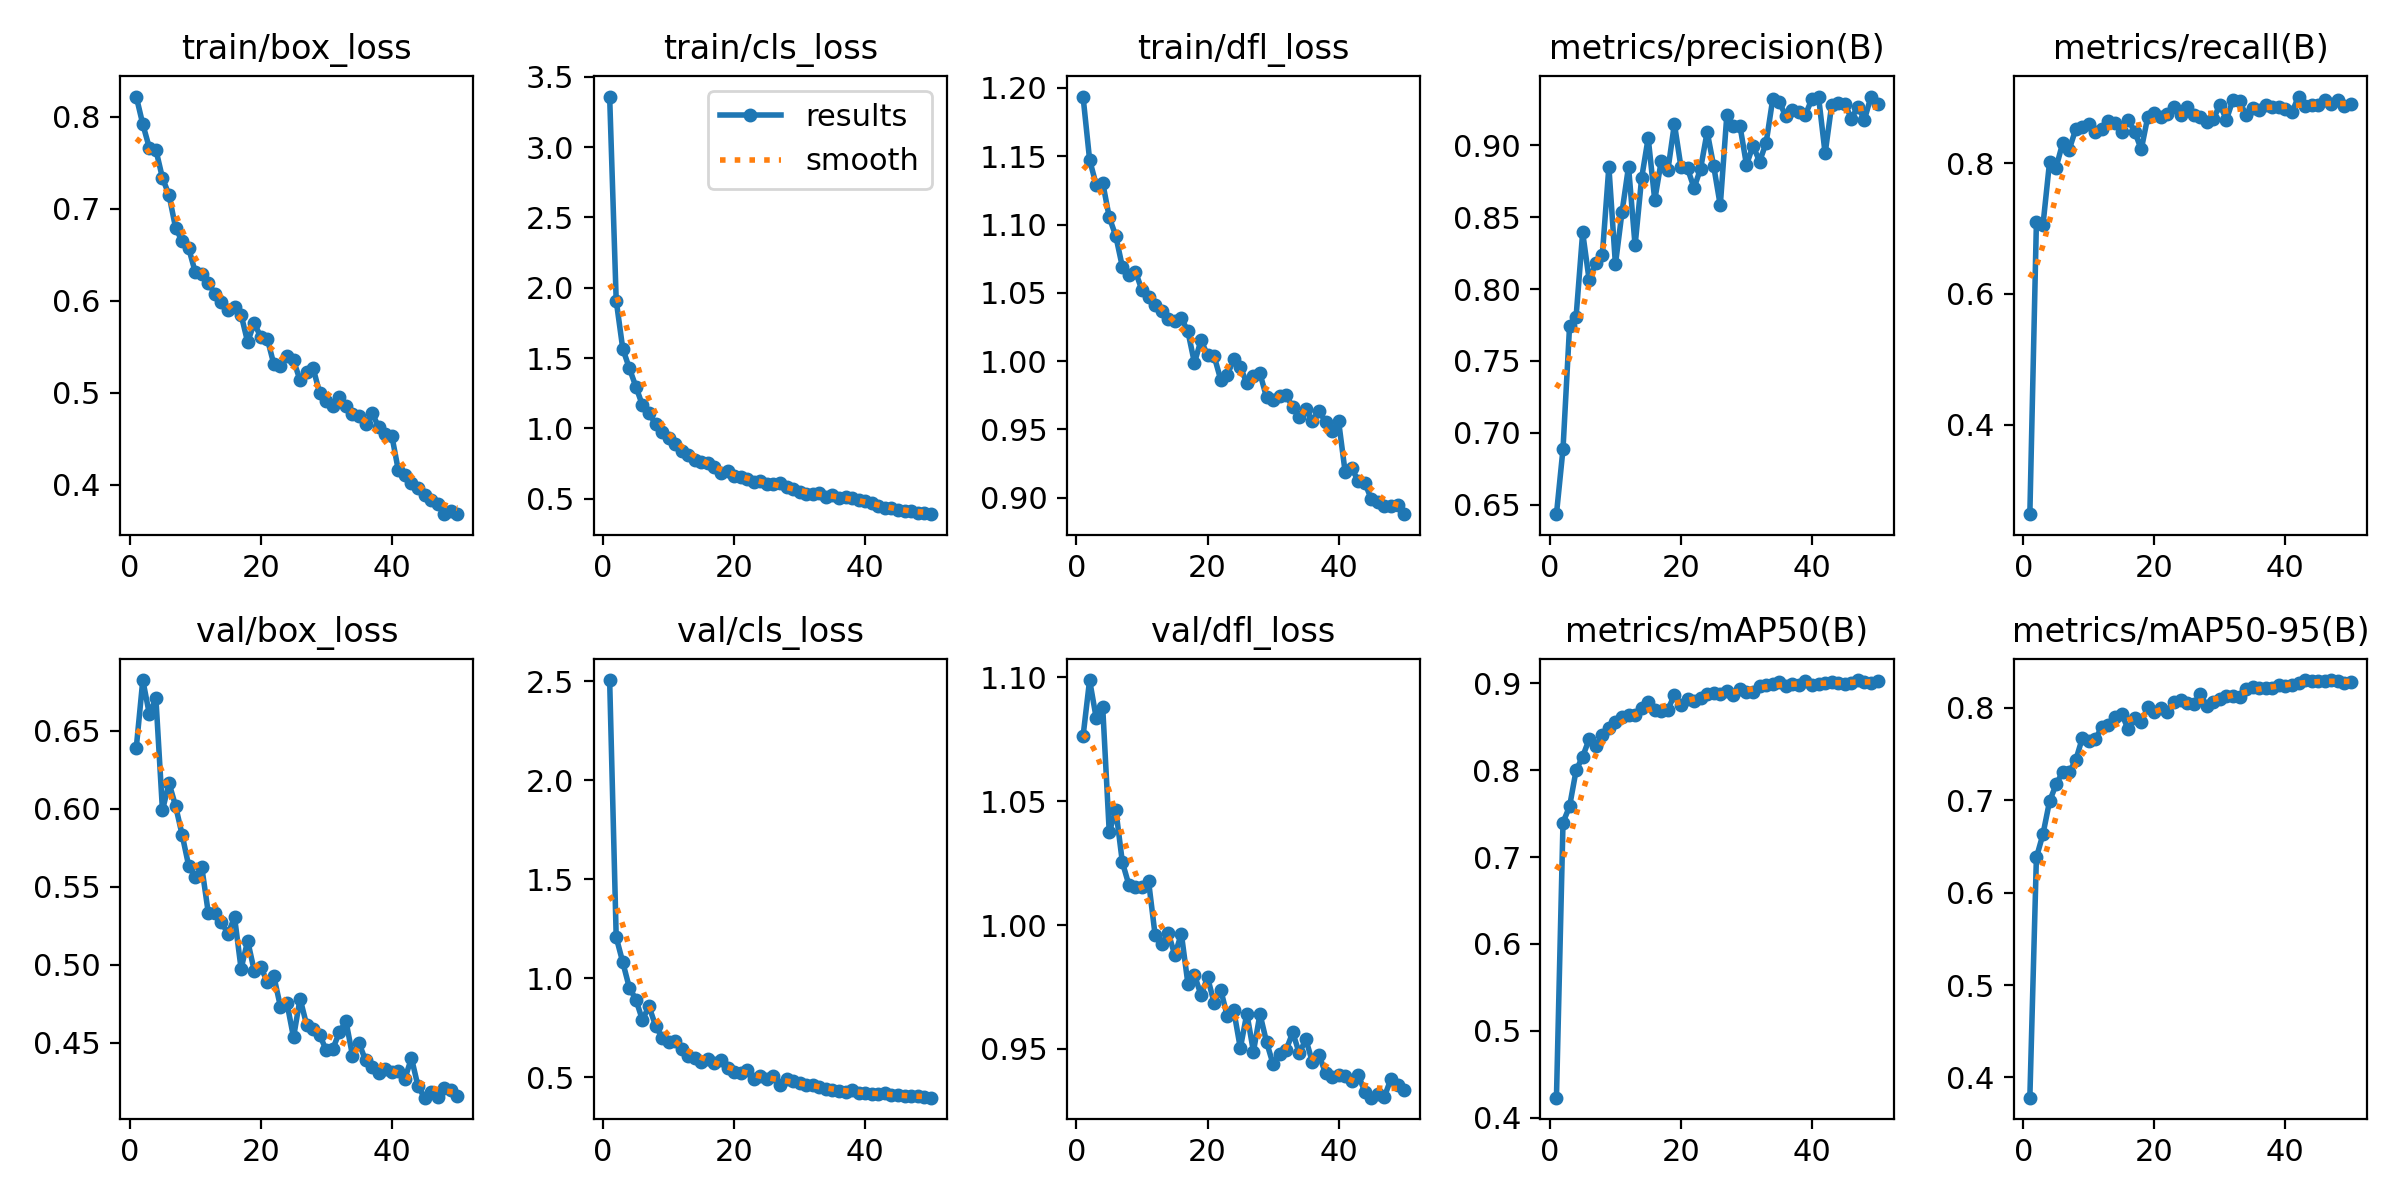

In [9]:
Image("/content/runs/detect/train/results.png", width=600)

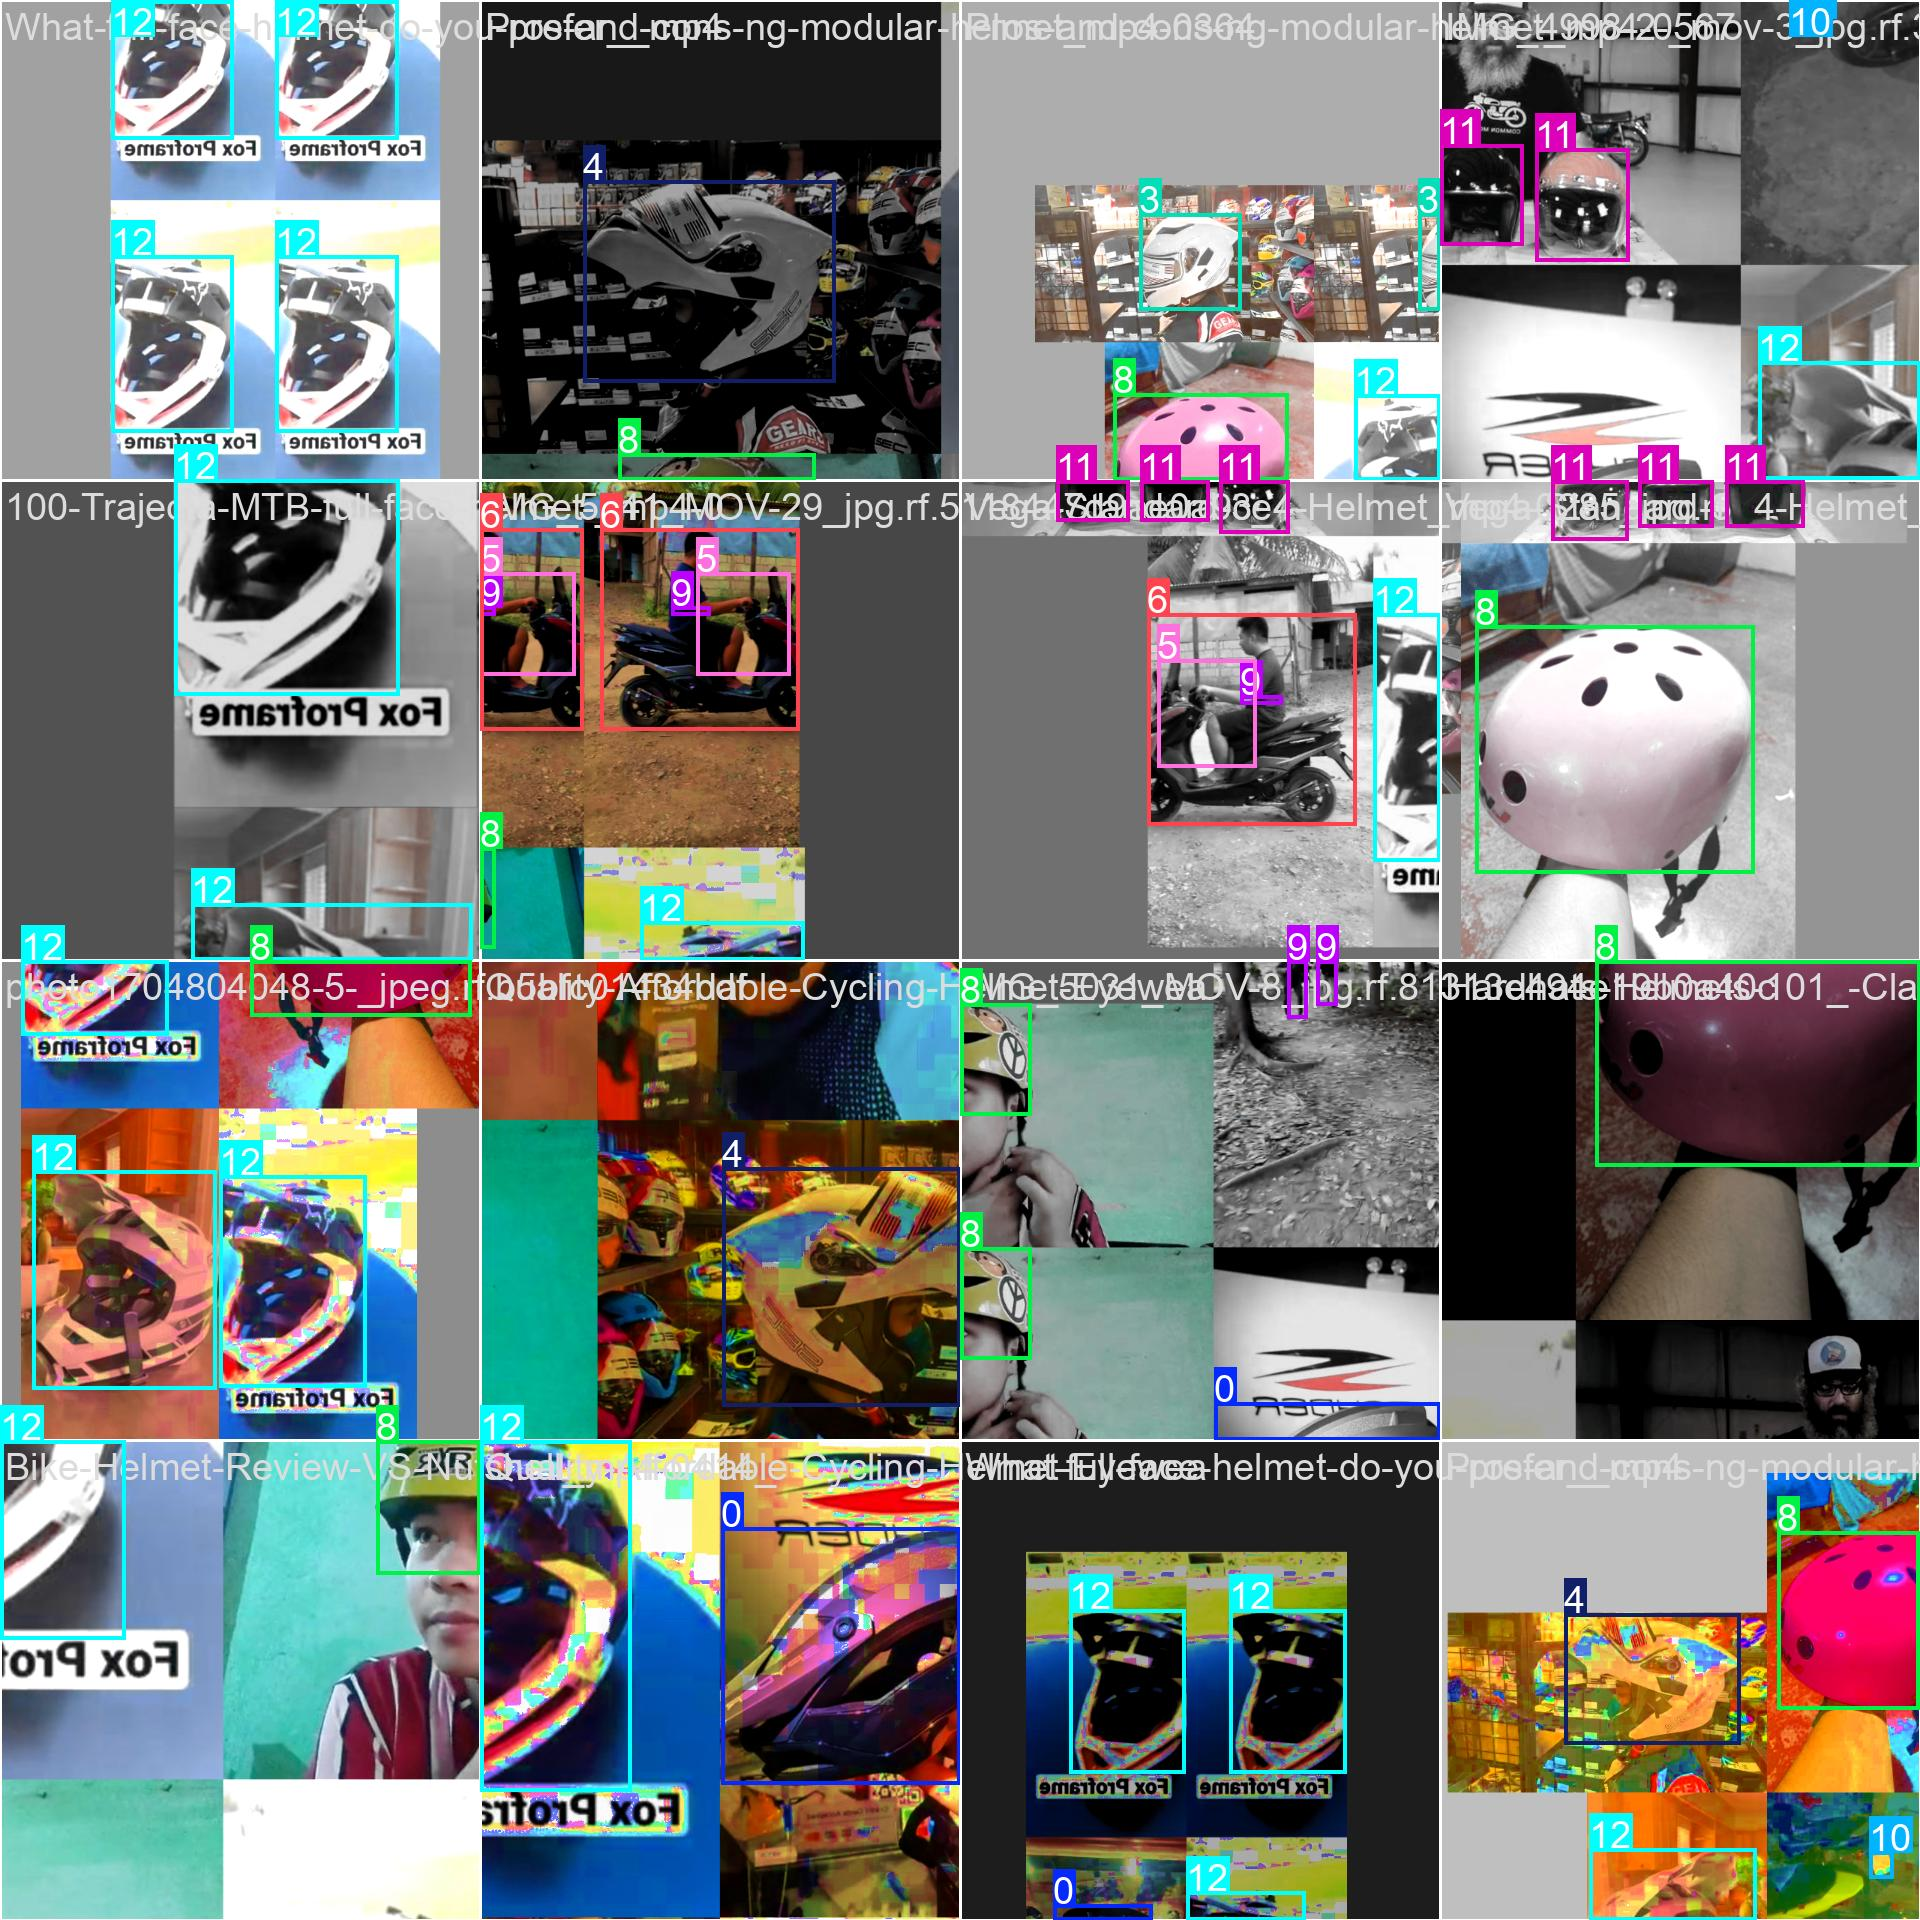

In [10]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

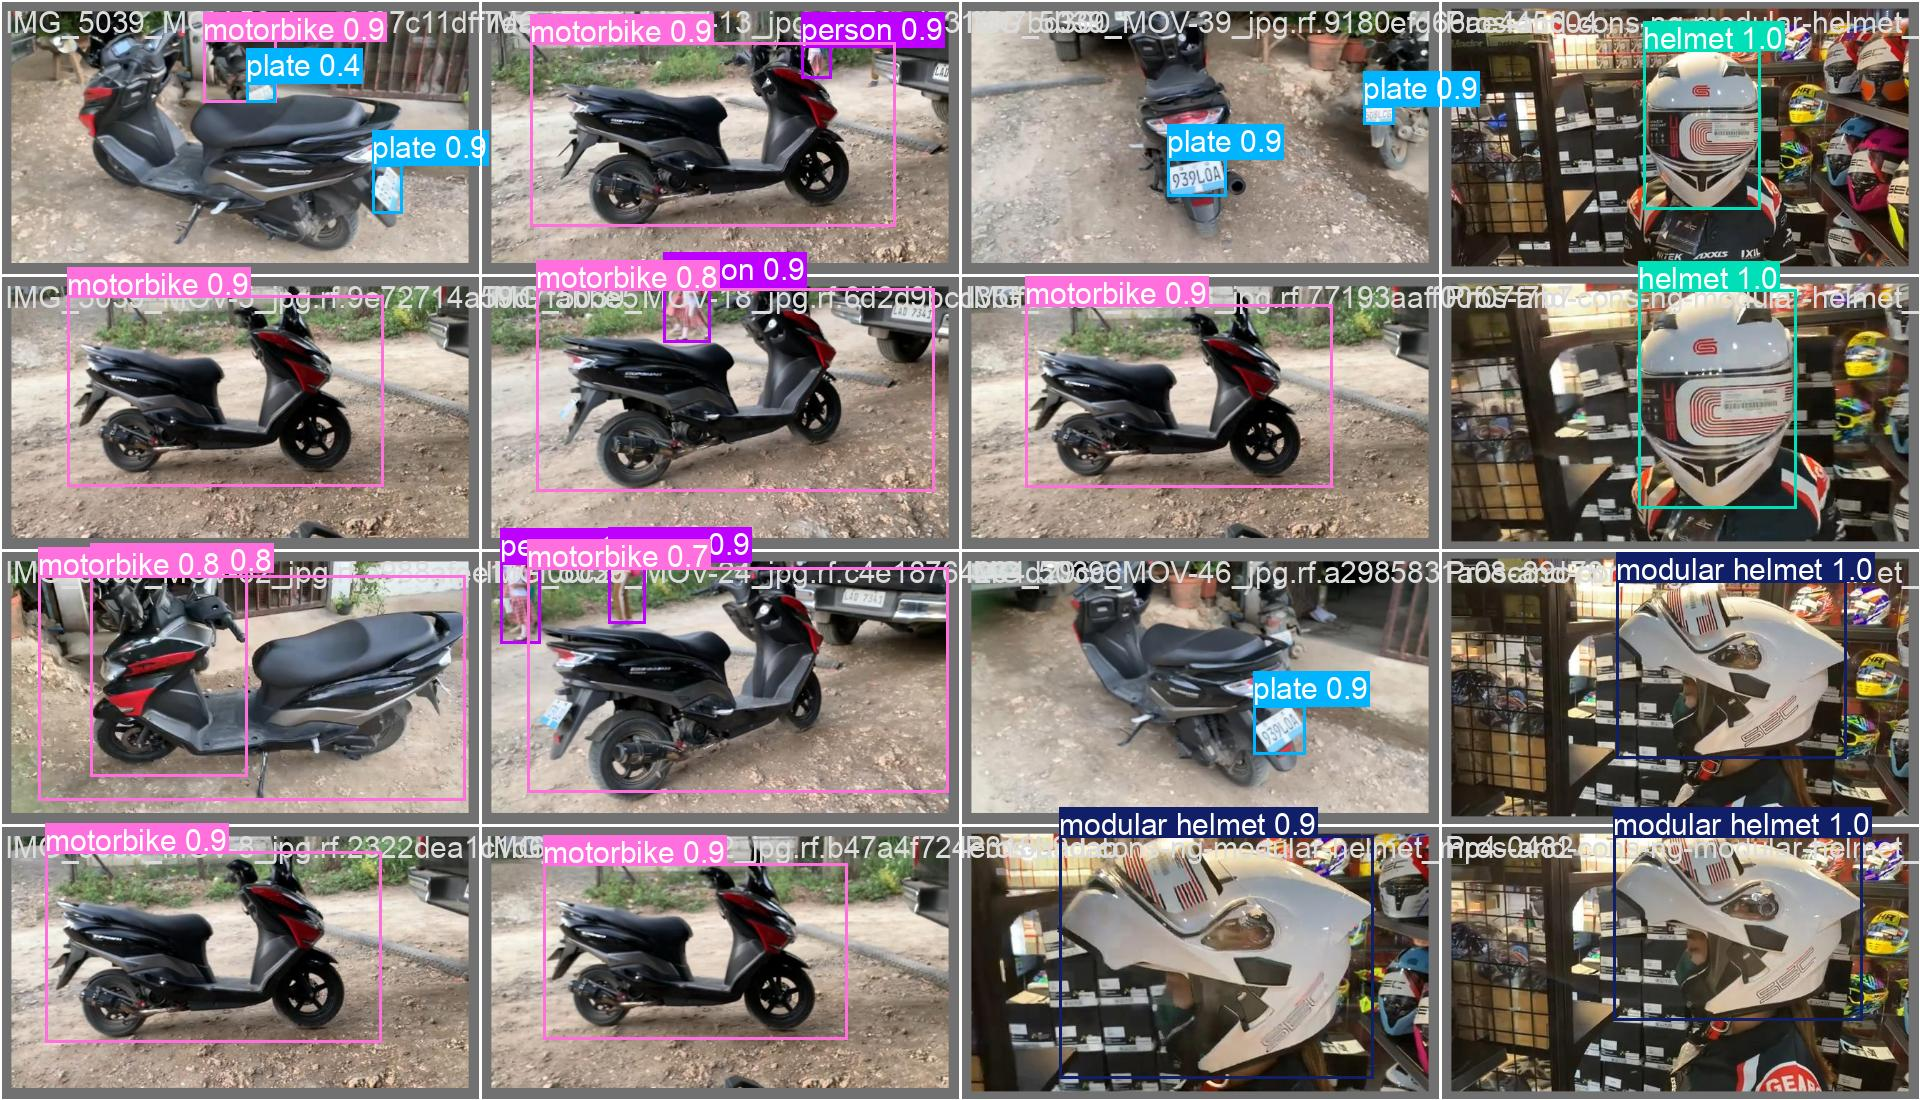

In [11]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

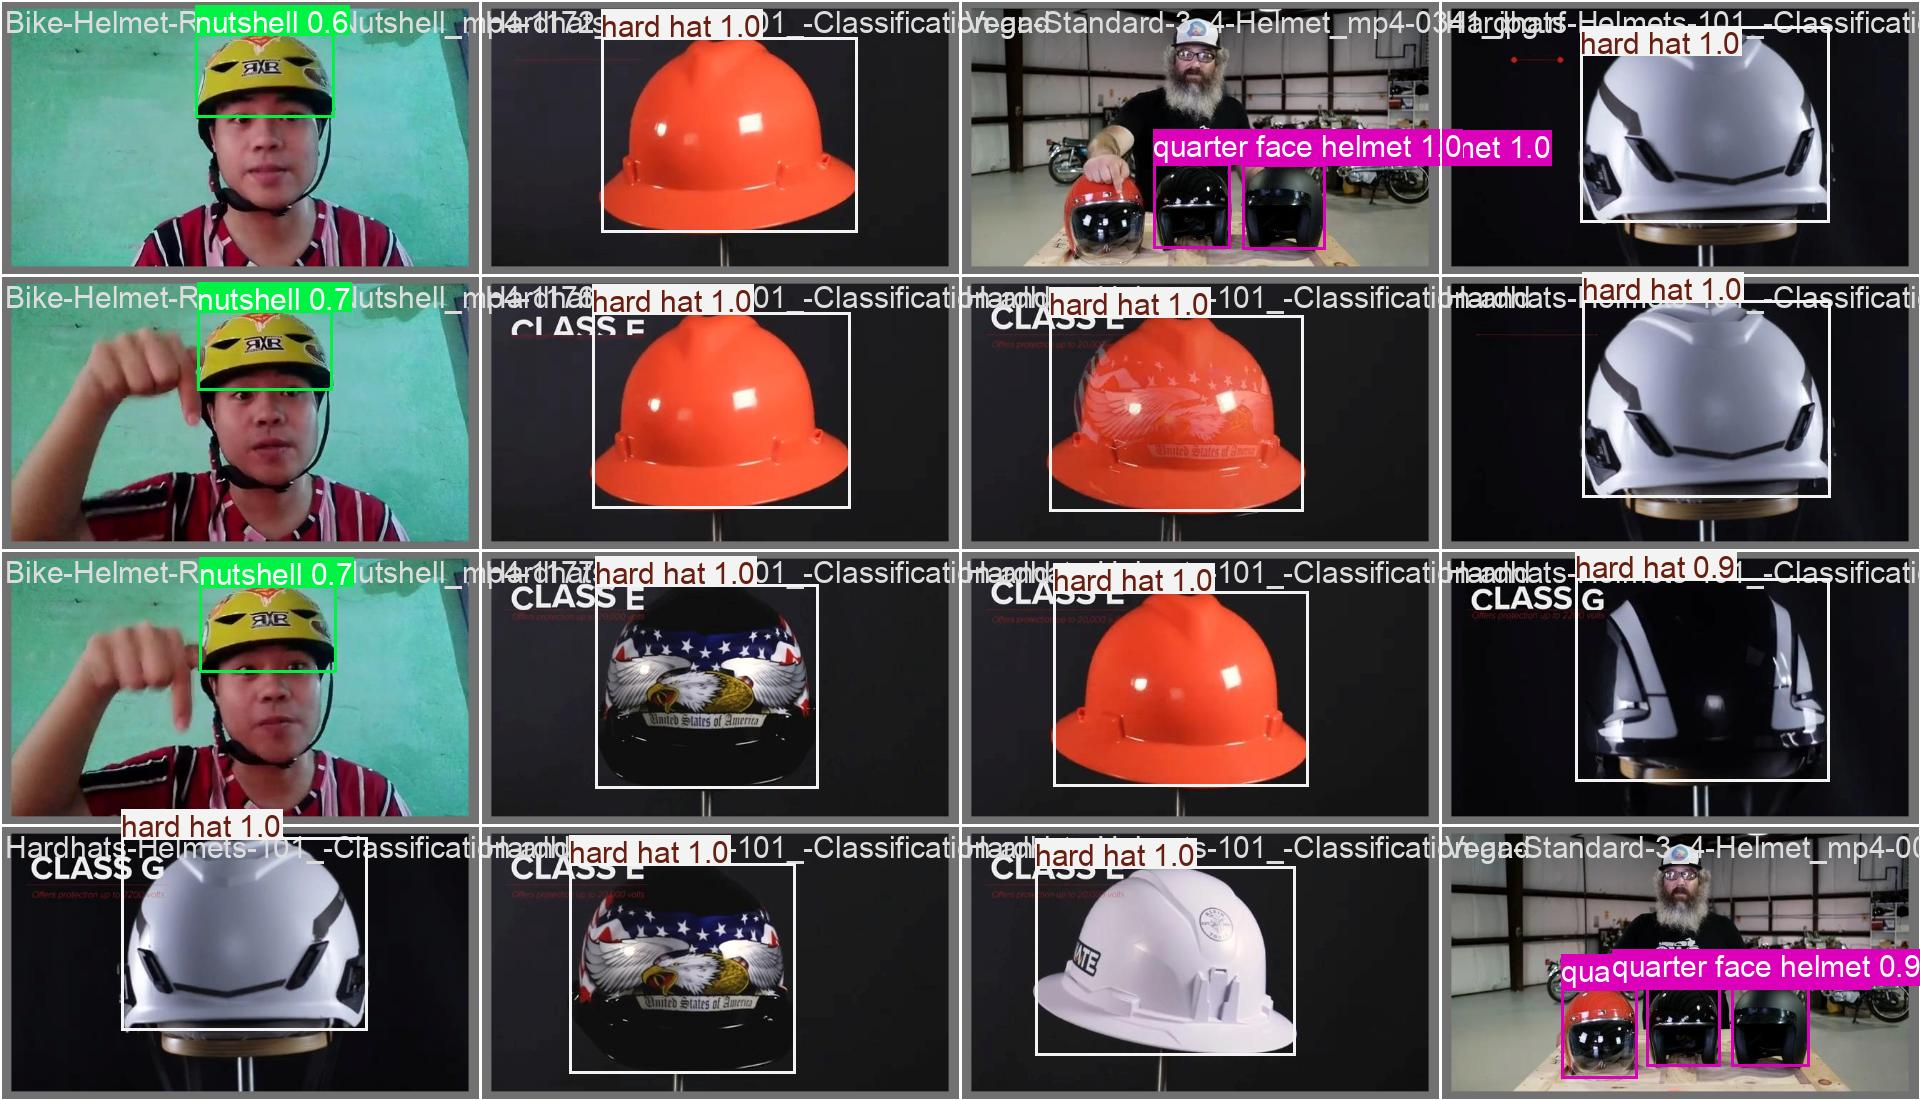

In [12]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

In [13]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0178_jpg.rf.40daedd08d8ee073d606a4e59773f75d.jpg: 640x384 1 sports helmet, 55.6ms
image 2/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.53fbc18ec2d3dbc33fa2ca90fe4d27f6.jpg: 640x384 1 sports helmet, 8.9ms
image 3/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0186_jpg.rf.4b0cfc853a5cddb12cc069cd568ee13f.jpg: 640x384 1 sports helmet, 8.7ms
image 4/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.ab2c103b611fa0377e8d8833d0d99e72.jpg: 640x384 1 sports helmet, 8.8ms
image 5/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg: 640x384 1

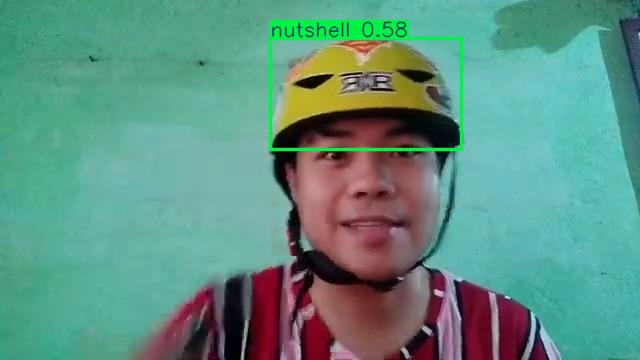

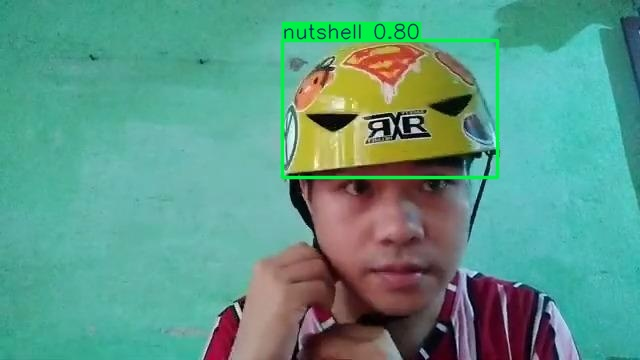

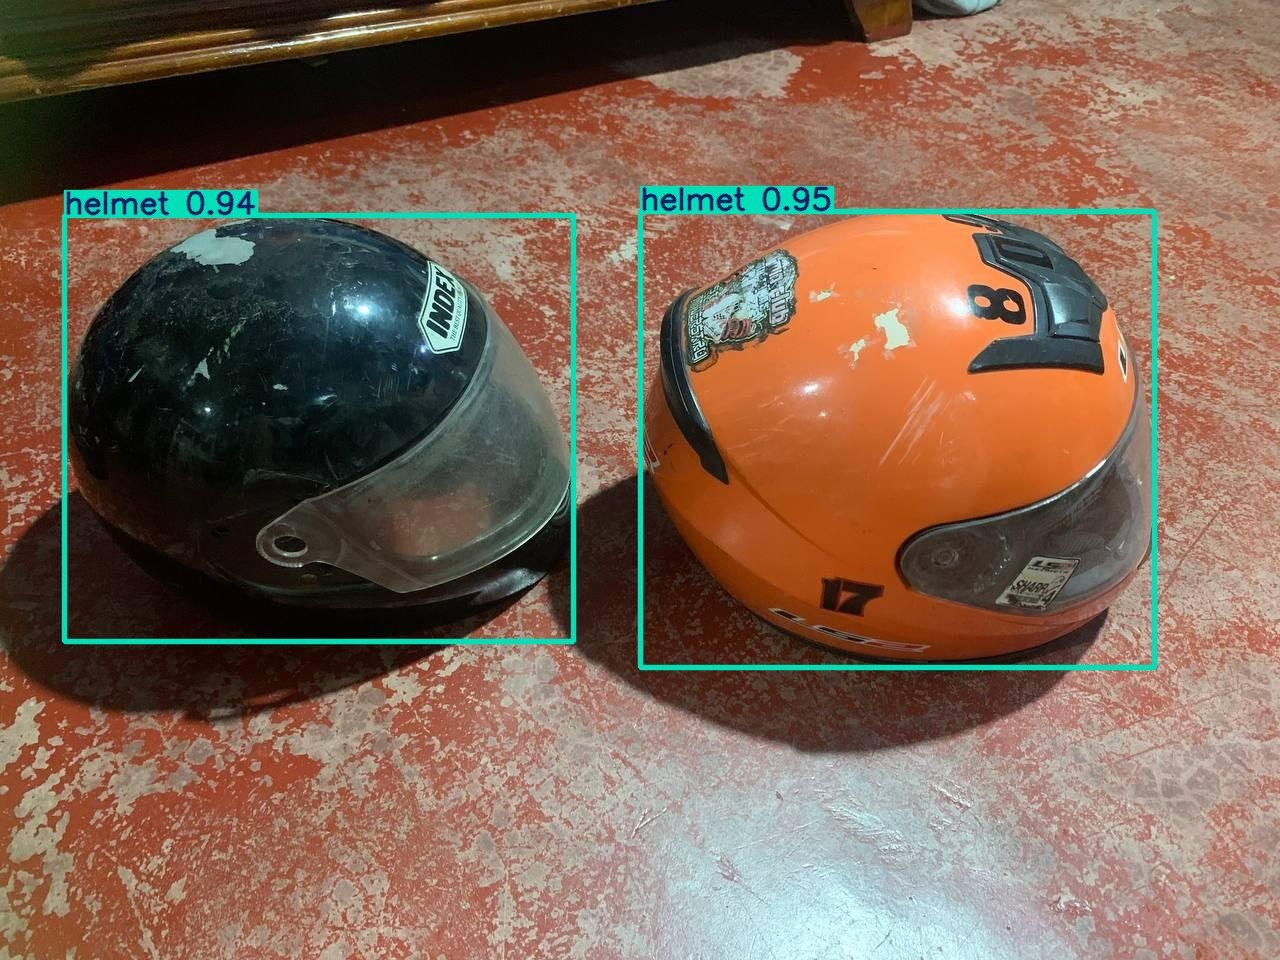

In [14]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [19]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=imagehel.jpg save=True

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/imagehel.jpg: 480x640 1 nutshell, 47.1ms
Speed: 4.0ms preprocess, 47.1ms inference, 124.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


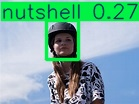

In [22]:
Image("/content/runs/detect/predict4/imagehel.jpg", width=600)